# Final Evaluation Notebook

## Load test CSV

In [2]:
import pandas as pd

test = pd.read_csv("test_final.csv")
X_test = test.drop("target", axis=1).values
y_test = test["target"].values

## Load the saved pickle model

In [4]:
import pickle
model = pickle.load(open("best_model.pkl", "rb"))

## Evaluate

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[930 103]
 [172 202]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.80      0.80      1407

Accuracy: 0.8045486851457001


In [6]:
from sklearn.metrics import roc_auc_score, roc_curve

# Check if model supports probability output
try:
    y_prob = model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, y_prob)
    print("ROC-AUC Score:", auc)

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

except:
    print("Model does not support predict_proba")


ROC-AUC Score: 0.8427429583115478
Model does not support predict_proba


### Final Evaluation Summary

Loaded the saved best model (Random Forest Tuned)

Loaded test dataset

Evaluated accuracy, precision, recall, F1 score

Generated confusion matrix & classification report

Plotted ROC curve and computed ROC-AUC score

This demonstrates the model’s final performance and ensures consistency with the training notebook.

### confusion matrix heatmap

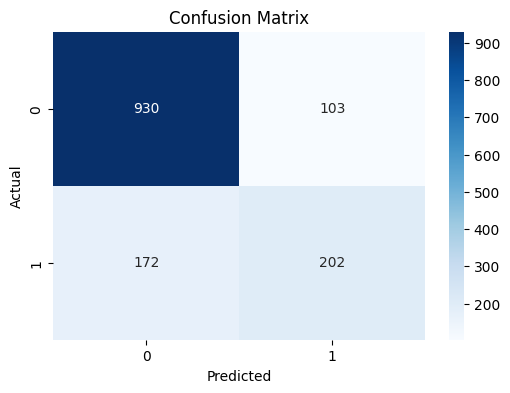

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Feature Importance Plot (Random Forest)

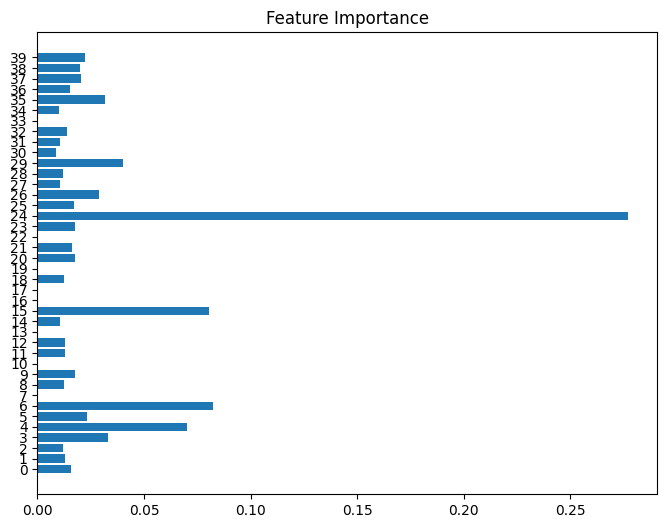

In [8]:
import pandas as pd
import numpy as np

importances = model.feature_importances_
features = pd.read_csv("test_final.csv").drop("target", axis=1).columns

plt.figure(figsize=(8,6))
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()
